In [8]:
import sunpy.map
from aiapy.calibrate import register, update_pointing,normalize_exposure
import astropy.units as u
import scipy
import matplotlib.pyplot as plt
import numpy as np
import glob
import time
import os

from pixel_to_world.std_pixel_to_world import std_pixel_to_world
from pixel_to_world.my_pixel_to_world import my_pixel_to_world
from calculate_DN import calculate_DN_4096
from gaussian_fit_aia import gaussian_fit_aia

from constant import wavelength_list_aia
from math import pi

In [9]:
aia_adjusted_files=sorted(glob.glob('data/AIA/*adjusted.fits'))
aia_adjusted_maps=sunpy.map.Map(aia_adjusted_files)

# AIA_basic
load AIA in Feb 
timeinterval :1h

In [6]:
# aia_path="data/AIA/aia_lev1_304a_2011_02_03t00_00_32_12z_image_lev1.fits"
aia_files = sorted(glob.glob('data/AIA/*image_lev1.fits'))
len(aia_files)
# m_aia=sunpy.map.Map(aia_path)
# m_aia

28

In [7]:
start=time.time()

aia_maps=sunpy.map.Map(aia_files)

end=time.time()
total=end-start
print(total)

6.154949903488159


Observatory,SDO
Instrument,AIA 4
Detector,AIA
Measurement,304.0 Angstrom
Wavelength,304.0 Angstrom
Observation Date,2011-02-03 00:04:08
Exposure Time,2.902157 s
Dimension,[4096. 4096.] pix
Coordinate System,helioprojective
Scale,[0.600165 0.600165] arcsec / pix
Reference Pixel,[2053.419922 2036.930054] pix

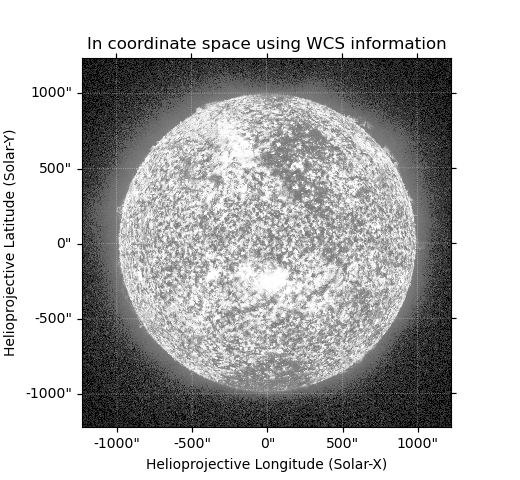
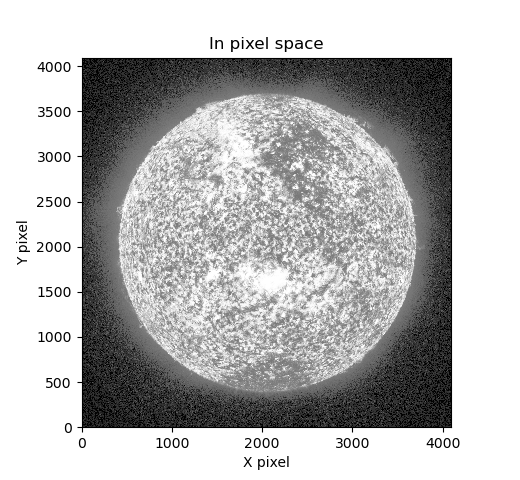
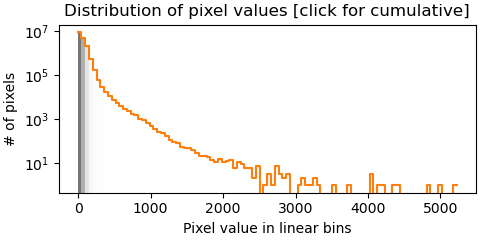
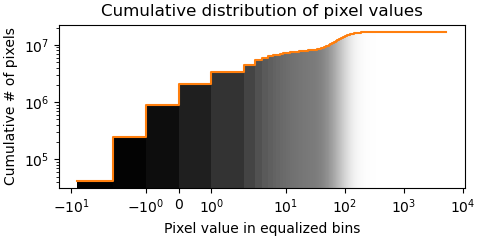

In [8]:
aia_maps[0]

## aiapy level 1.5 processing
https://aiapy.readthedocs.io/en/stable/generated/gallery/prepping_level_1_data.html#sphx-glr-generated-gallery-prepping-level-1-data-py

In [3]:
#用aiapy处理sunpy map 得到 level 1.5 的数据，并存成"_adjusted.fits"

for i in range(len(aia_files)):
    try:
        # Load the original map from a file
        original_map = sunpy.map.Map(aia_files[i])
        
        # Adjust the map using aiapy functions
        adjusted_map = normalize_exposure(register(update_pointing(original_map)))
        
        # Save the adjusted map to a new file
        new_file = aia_files[i].replace('.fits', '_adjusted.fits')
        adjusted_map.save(new_file, overwrite=True)
        
        print(f"Saved adjusted map to {new_file}")

    except:
        print(f"Error  file {aia_files[i]}")


Saved adjusted map to data/AIA\aia_lev1_304a_2011_02_03t00_04_08_12z_image_lev1_adjusted.fits


Saved adjusted map to data/AIA\aia_lev1_304a_2011_02_04t00_04_08_13z_image_lev1_adjusted.fits


Saved adjusted map to data/AIA\aia_lev1_304a_2011_02_05t00_04_08_12z_image_lev1_adjusted.fits


Saved adjusted map to data/AIA\aia_lev1_304a_2011_02_06t00_04_08_13z_image_lev1_adjusted.fits


Saved adjusted map to data/AIA\aia_lev1_304a_2011_02_07t00_04_08_12z_image_lev1_adjusted.fits


Saved adjusted map to data/AIA\aia_lev1_304a_2011_02_08t00_04_08_14z_image_lev1_adjusted.fits


Saved adjusted map to data/AIA\aia_lev1_304a_2011_02_09t00_04_08_14z_image_lev1_adjusted.fits


Saved adjusted map to data/AIA\aia_lev1_304a_2011_02_10t00_04_08_12z_image_lev1_adjusted.fits


Saved adjusted map to data/AIA\aia_lev1_304a_2011_02_11t00_04_08_14z_image_lev1_adjusted.fits


Saved adjusted map to data/AIA\aia_lev1_304a_2011_02_12t00_04_08_12z_image_lev1_adjusted.fits


Saved adjusted map to data/AIA\aia_lev1_304a_2011_02_13t00_04_08_14z_image_lev1_adjusted.fits


Saved adjusted map to data/AIA\aia_lev1_304a_2011_02_14t00_04_08_13z_image_lev1_adjusted.fits


Saved adjusted map to data/AIA\aia_lev1_304a_2011_02_15t00_04_08_12z_image_lev1_adjusted.fits


Saved adjusted map to data/AIA\aia_lev1_304a_2011_02_16t00_04_08_13z_image_lev1_adjusted.fits


Saved adjusted map to data/AIA\aia_lev1_304a_2011_02_17t00_04_08_12z_image_lev1_adjusted.fits


Saved adjusted map to data/AIA\aia_lev1_304a_2011_02_18t00_04_08_12z_image_lev1_adjusted.fits


Saved adjusted map to data/AIA\aia_lev1_304a_2011_02_19t00_04_08_12z_image_lev1_adjusted.fits


Saved adjusted map to data/AIA\aia_lev1_304a_2011_02_20t00_04_08_12z_image_lev1_adjusted.fits


Saved adjusted map to data/AIA\aia_lev1_304a_2011_02_21t00_04_08_12z_image_lev1_adjusted.fits


Saved adjusted map to data/AIA\aia_lev1_304a_2011_02_22t00_04_08_12z_image_lev1_adjusted.fits


Saved adjusted map to data/AIA\aia_lev1_304a_2011_02_23t00_04_08_12z_image_lev1_adjusted.fits


Saved adjusted map to data/AIA\aia_lev1_304a_2011_02_24t00_04_08_14z_image_lev1_adjusted.fits


Saved adjusted map to data/AIA\aia_lev1_304a_2011_02_25t00_04_08_12z_image_lev1_adjusted.fits


Saved adjusted map to data/AIA\aia_lev1_304a_2011_02_26t00_04_08_12z_image_lev1_adjusted.fits


Saved adjusted map to data/AIA\aia_lev1_304a_2011_02_27t00_04_08_12z_image_lev1_adjusted.fits


Saved adjusted map to data/AIA\aia_lev1_304a_2011_02_28t00_04_08_12z_image_lev1_adjusted.fits


Saved adjusted map to data/AIA\aia_lev1_304a_2011_03_01t00_04_08_12z_image_lev1_adjusted.fits
Saved adjusted map to data/AIA\aia_lev1_304a_2011_03_02t00_04_08_13z_image_lev1_adjusted.fits


## aiapy adjusted maps

In [4]:
aia_adjusted_files=sorted(glob.glob('data/AIA/*adjusted.fits'))
len(aia_adjusted_files)

28

Observatory,SDO
Instrument,AIA 4
Detector,AIA
Measurement,304.0 Angstrom
Wavelength,304.0 Angstrom
Observation Date,2011-02-03 00:04:08
Exposure Time,1.0 s
Dimension,[4096. 4096.] pix
Coordinate System,helioprojective
Scale,[0.6 0.6] arcsec / pix
Reference Pixel,[2047.5 2047.5] pix

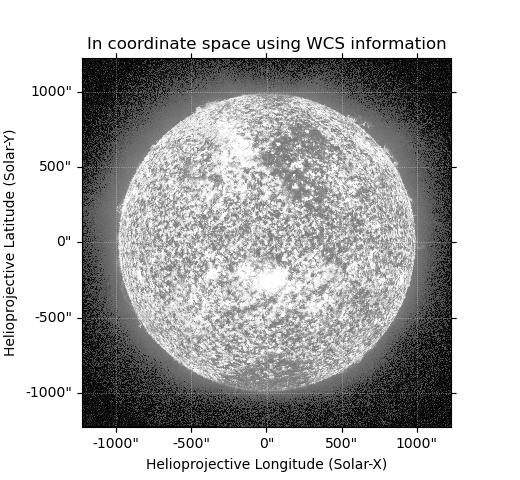
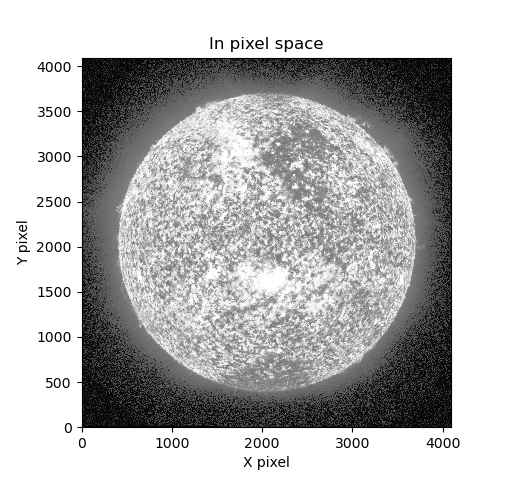
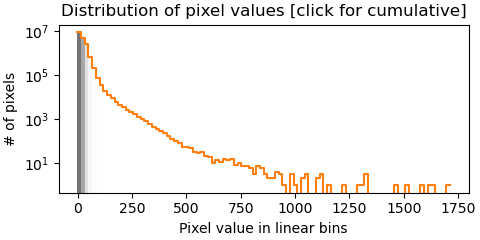
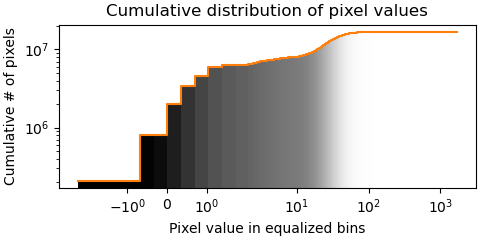

In [5]:
aia_adjusted_maps=sunpy.map.Map(aia_adjusted_files)
aia_adjusted_maps[0]

## pixel_to_world check
经过aiapy校正达到了 level 1.5 ，每个图日面中心在图片中心，每个pixel 0.6 arcsec
就是每个aiapy map 有相同的pixel_to_world 函数

In [65]:
for i in range(len(aia_adjusted_maps)):
    print(std_pixel_to_world(aia_adjusted_maps[i],204.5,247.5))

(-0.0053610183256379874, -0.005235864667321824)
(-0.0053610183256379874, -0.005235864667321824)
(-0.0053610183256379874, -0.005235864667321824)
(-0.0053610183256379874, -0.005235864667321824)
(-0.0053610183256379874, -0.005235864667321824)
(-0.0053610183256379874, -0.005235864667321824)
(-0.0053610183256379874, -0.005235864667321824)
(-0.0053610183256379874, -0.005235864667321824)
(-0.0053610183256379874, -0.005235864667321824)
(-0.0053610183256379874, -0.005235864667321824)
(-0.0053610183256379874, -0.005235864667321824)
(-0.0053610183256379874, -0.005235864667321824)
(-0.0053610183256379874, -0.005235864667321824)
(-0.0053610183256379874, -0.005235864667321824)
(-0.0053610183256379874, -0.005235864667321824)
(-0.0053610183256379874, -0.005235864667321824)
(-0.0053610183256379874, -0.005235864667321824)
(-0.0053610183256379874, -0.005235864667321824)
(-0.0053610183256379874, -0.005235864667321824)
(-0.0053610183256379874, -0.005235864667321824)
(-0.0053610183256379874, -0.005235864667

In [59]:
# map 自带的pixel_to_world 函数很慢
start=time.time()
for i in range(1000):
    std_pixel_to_world(aia_adjusted_maps[0],2047.5,2047.5)
end=time.time()
end-start

3.4497623443603516

In [41]:
std_pixel_to_world(aia_adjusted_maps[0],2047.5,2047.5)
my_pixel_to_world(2047.5,2047.5)

array([-1.65990413e-05,  7.09122684e-05])

In [49]:
aia_adjusted_maps[0].pixel_to_world(2047.5*u.pix,2047.5*u.pix)

<SkyCoord (Helioprojective: obstime=2011-02-03T00:00:08.120, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2011-02-03T00:00:08.120, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (-0.01445003, -6.14307676, 1.47426682e+11)>): (Tx, Ty) in arcsec
    (1.5467383e-27, 0.)>

In [60]:
#手动检验日面边缘的点，肉眼观测太阳边缘角半径 985
# metadata中角半径为 974
aia_adjusted_maps[0].pixel_to_world(3690*u.pix,2047*u.pix)

<SkyCoord (Helioprojective: obstime=2011-02-03T00:00:08.120, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2011-02-03T00:00:08.120, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (-0.01445003, -6.14307676, 1.47426682e+11)>): (Tx, Ty) in arcsec
    (985.49250119, -0.29999658)>

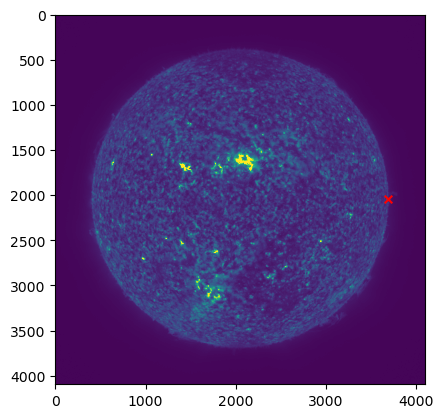

In [57]:
fig,ax = plt.subplots()
ax.imshow(aia_adjusted_maps[0].data,vmax=200)
ax.scatter(3690,2047,marker='x',c='r',s=30)

In [40]:
aia_adjusted_maps[0].meta['rsun_obs']

973.777854

### my pixel to world

In [9]:
my_pixel_to_world(30,30)*3600*180/pi

array([-1210.49123772, -1210.48393322])

In [10]:
aia_adjusted_maps[0].pixel_to_world(30*u.pix,30*u.pix)

<SkyCoord (Helioprojective: obstime=2011-02-03T00:00:08.120, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2011-02-03T00:00:08.120, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (-0.01445003, -6.14307676, 1.47426682e+11)>): (Tx, Ty) in arcsec
    (-1210.48610323, -1210.4652589)>

In [12]:
#my_pixel_to_world 速度远远快于map自带的函数
start=time.time()
for i in range(1000):
    my_pixel_to_world(2047.5,2047.5)
end=time.time()
end-start

0.0009961128234863281

## calculate DN

In [ ]:
start=time.time()
for i in range(10):
    a=calculate_DN_4096(aia_adjusted_maps[0])
end=time.time()
total=end-start
total

In [4]:
a=calculate_DN_4096(aia_adjusted_maps[0])
a

array([7.83546751e+07, 2.41017935e+08, 5.95346765e+08, 1.18105734e+09,
       1.88190330e+09, 2.40876535e+09, 2.47689881e+09, 2.04636973e+09,
       1.35852244e+09, 7.24769700e+08, 3.10760364e+08, 1.07098446e+08])

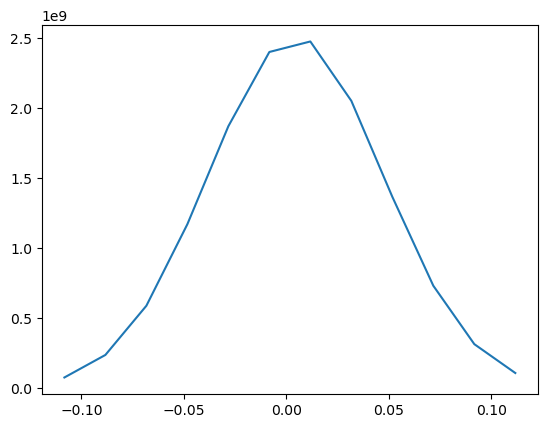

In [7]:
fig,ax=plt.subplots()
ax.plot(wavelength_list,a)

## Gaussian fit

In [5]:
a

array([7.83546751e+07, 2.41017935e+08, 5.95346765e+08, 1.18105734e+09,
       1.88190330e+09, 2.40876535e+09, 2.47689881e+09, 2.04636973e+09,
       1.35852244e+09, 7.24769700e+08, 3.10760364e+08, 1.07098446e+08])

In [7]:
gaussian_fit_aia(wavelength_list_aia,a)

0.004295130055446542

# Correction of Feb

In [11]:
irradiance=np.zeros((len(aia_adjusted_maps),len(wavelength_list_aia)))
correction=np.zeros(len(aia_adjusted_maps))
irradiance.shape

(28, 12)

In [13]:
for i in range(len(aia_adjusted_maps)):
    irradiance[i]=calculate_DN_4096(aia_adjusted_maps[i])
    correction[i]=gaussian_fit_aia(wavelength_list_aia,irradiance[i])

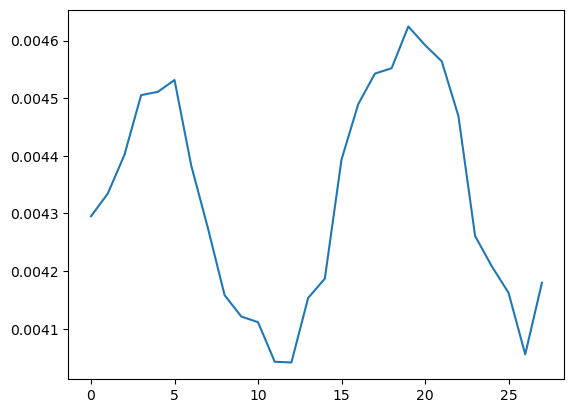

In [15]:
fig,ax=plt.subplots()
ax.plot(correction)

### GD draft

In [5]:
import numpy as np
from scipy.optimize import minimize
import time

def f(x):
    a, b, c = x
    # define your function here
    time.sleep(0.05)
    return a**2 + b**2 + c**2-9

# define initial values of a, b, c
x0 = np.array([1.0, 2.0, 3000.0])

# define a callback function to track the optimization process
def callback(x):
    global num_evals
    num_evals += 1
    print(f"Iteration {num_evals}: f({x}) = {f(x)}")

num_evals = 0
# minimize f using L-BFGS
result = minimize(f, x0, callback=callback,options={'maxiter': 1000})

# print the optimal values of a, b, c
print(f"Optimal values: {result.x}")
print(result)

Iteration 1: f([8.85196699e-01 1.77039340e+00 2.65559010e+03]) = 7052153.674083828
Iteration 2: f([6.87817215e-01 1.22376258e+00 1.91476910e+03]) = 3666333.6815973413
Iteration 3: f([ -0.16648988   0.24005427 128.81872369]) = 16585.34891825479
Iteration 4: f([ 0.22809455 -0.16769379 -0.00026706]) = -8.919851596836521
Iteration 5: f([ 2.35069590e-05 -1.79794463e-05 -7.48283781e-04]) = -8.999999439195545
Iteration 6: f([ 4.72425695e-08  5.43422087e-08 -1.88767107e-09]) = -8.999999999999995
Optimal values: [ 4.72425695e-08  5.43422087e-08 -1.88767107e-09]
      fun: -8.999999999999995
 hess_inv: array([[ 6.75431649e-01,  2.38620054e-01, -2.18062057e-04],
       [ 2.38620054e-01,  8.24568028e-01, -2.96707059e-04],
       [-2.18062057e-04, -2.96707059e-04,  5.00003757e-01]])
      jac: array([1.1920929e-07, 1.1920929e-07, 0.0000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 48
      nit: 6
     njev: 12
   status: 0
  success: True
        x: array([ 4.72425695e-08,

In [2]:
result?

Type:        OptimizeResult
String form:
fun: 1.0397498709736878e-16
           hess_inv: array([[ 6.75431819e-01,  2.38620072e-01, -2.1811575 <...>   status: 0
           success: True
           x: array([-7.10509671e-09, -6.96428190e-09, -2.23413638e-09])
Length:      10
File:        c:\users\asus-pc\anaconda3\envs\py_begin\lib\site-packages\scipy\optimize\_optimize.py
Docstring:  
Represents the optimization result.

Attributes
----------
x : ndarray
    The solution of the optimization.
success : bool
    Whether or not the optimizer exited successfully.
status : int
    Termination status of the optimizer. Its value depends on the
    underlying solver. Refer to `message` for details.
message : str
    Description of the cause of the termination.
fun, jac, hess: ndarray
    Values of objective function, its Jacobian and its Hessian (if
    available). The Hessians may be approximations, see the documentation
    of the function in question.
hess_inv : object
    Inverse of the ob

### read sav file test

In [6]:
m=scipy.io.readsav('test.sav')
m

{'b': array([[2, 3],
        [6, 5]], dtype=int16)}